In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
x_data = np.linspace(0.0,10.0,100000)


In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_true = (0.5*x_data) + 5 + noise

In [5]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [6]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [7]:
y_df.head()

,Y
0,5.993287
1,6.021236
2,5.617464
3,3.970330
4,6.854707


In [8]:
my_data = pd.concat([x_df,y_df],axis=1)

In [9]:
my_data.head()

,X Data,Y
0,0.0000,5.993287
1,0.0001,6.021236
2,0.0002,5.617464
3,0.0003,3.970330
4,0.0004,6.854707


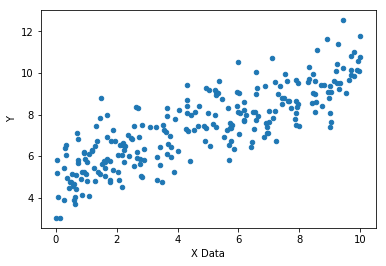

In [12]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [13]:
batch_size = 8

In [14]:
np.random.randn(2)

array([-0.45434317, -0.21230618])

In [16]:
m = tf.Variable(-0.45)

In [17]:
b = tf.Variable(-0.21)

In [18]:
xph = tf.placeholder(tf.float32,[batch_size])

In [19]:
yph = tf.placeholder(tf.float32,[batch_size])

In [20]:
y_model = m*xph + b

In [21]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [23]:
init = tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m , model_b = sess.run([m,b])

In [26]:
model_m

0.5226902

In [27]:
model_b

4.887747

In [28]:
y_hat = x_data*model_m + model_b

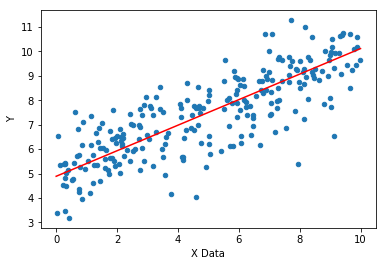

In [30]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator

In [78]:
feat_cols =[tf.feature_column.numeric_column('x',shape=[1])]

In [79]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsukrzi10', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fabfa9b1b00>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [82]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [83]:
train_input_func  = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [84]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [85]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpsukrzi10/model.ckpt.
INFO:tensorflow:loss = 490.90796, step = 1
INFO:tensorflow:global_step/sec: 404.023
INFO:tensorflow:loss = 12.5754, step = 101 (0.252 sec)
INFO:tensorflow:global_step/sec: 545.858
INFO:tensorflow:loss = 26.642155, step = 201 (0.181 sec)
INFO:tensorflow:global_step/sec: 783.225
INFO:tensorflow:loss = 14.775944, step = 301 (0.129 sec)
INFO:tensorflow:global_step/sec: 741.957
INFO:tensorflow:loss = 8.897215, step = 401 (0.132 sec)
INFO:tensorflow:global_step/sec: 709.185
INFO:tensorflow:loss = 3.2479796, step = 501 (0.141 sec)
INFO:tensorflow:global_step/sec: 758.054
INFO:tensorflow:loss = 4.872545, step = 601 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.451
INFO:tensorflow:loss

In [86]:
train_matrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-10-22:44:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsukrzi10/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-10-22:44:52
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0754424, global_step = 1000, label/mean = 7.509806, loss = 8.603539, prediction/mean = 7.330451
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: